In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
import os
import os.path
import seaborn as sns

In [2]:
file_path_1 = r'2020_Problem_D_DATA/fullevents.csv'
file_path_2 = r'2020_Problem_D_DATA/matches.csv'
full_events = pd.read_csv(file_path_1)
matches = pd.read_csv(file_path_2)
full_events.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,34.0,11.0,22.0,0.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,22.0,0.0,66.0,3.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0


## 对数据进行预处理
* 将数据中的空白值'NaN'替换为其他有意义的值

In [3]:
#处理NaN数据
full_events.EventSubType.fillna('Offside') # 将EventSubType列中的NaN数据转换为字符串'Offside'

0        Goal kick
1         Air duel
2         Air duel
3         Throw in
4        Head pass
           ...    
59266        Touch
59267       Corner
59268     Air duel
59269     Air duel
59270         Shot
Name: EventSubType, Length: 59271, dtype: object

## 下面将原始数据中的类别型变量编码
* 例如：将'射门' 编码为1；'传球'编码为2

In [4]:
from sklearn.preprocessing import LabelEncoder
# 将EventType与EventSubType 两列编码
object_cols = ['EventType','EventSubType']

encoders = {} # 将编码对应关系储存在encoders字典中
for col in object_cols:
    label_encoder = LabelEncoder()
    full_events[col] = label_encoder.fit_transform(full_events[col].values.tolist())
    encoders[col] = label_encoder

In [25]:
# 逆转换方法与示例：
code = 10#full_events.iloc[0].EventSubType
decode = encoders['EventSubType'].inverse_transform([code])
print('原本编码为{},解码后为{}'.format(code,decode))

原本编码为10,解码后为['Goal kick']


In [6]:
full_events.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,2,10,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,0,1,34.0,11.0,22.0,0.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,0,1,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,2,31,22.0,0.0,66.0,3.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,7,17,34.0,97.0,59.0,95.0


## 将数据分类，提取有用信息
* 提取出Huskies队员编号，存放入Huskies_member中
* 将每一场比赛的数据分离，分为第一场比赛的数据、第二场比赛的数据，等；存放入Match_dict字典中
* 提取出各场比赛中Huskies队的动作，存放入Huskies_Match_dict中

In [7]:
# Huskies_member 列表存放所有Huskies 队员ID
Huskies_member = [person for person in full_events.OriginPlayerID.unique().tolist() if 'Huskies' in person]

############################################
max_MatchID = full_events.MatchID.max() # 比赛最大场数
Match_dict = {} # Match_dict字典里存放各[场]比赛的数据(full_events)
for match_index in range(1,max_MatchID+1):
    Match_dict['Match'+ str(match_index)] = full_events.loc[full_events.MatchID == match_index].reset_index(drop=True)
    
# 示例: 显示第二场比赛的数据
#Match_dict['Match2'].head()

############################################
# Huskies_Match_dict 存放[Huskies队]每场比赛的各个动作
Huskies_Match_dict = {}
for index in range(1,max_MatchID+1):
    Huskies_Match_dict['Match'+str(index)] = Match_dict['Match'+str(index)].loc[Match_dict['Match'+str(index)].TeamID=='Huskies'].reset_index(drop=True)

# 示例: 显示第一场比赛的数据
print('Huskies在本场比赛中进行了{}次动作'.format(Huskies_Match_dict['Match1'].index.max()))

Huskies在本场比赛中进行了863次动作


In [8]:
Huskies_Match_dict['Match1'].head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,2,10,0.0,0.0,66.0,89.0
1,1,Huskies,Huskies_F1,NaN,1H,33.812965,0,1,66.0,89.0,78.0,100.0
2,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,7,17,34.0,97.0,59.0,95.0
3,1,Huskies,Huskies_F1,NaN,1H,47.004714,0,14,59.0,95.0,64.0,94.0
4,1,Huskies,Huskies_F1,NaN,1H,49.880983,7,17,55.0,95.0,57.0,93.0


#### 搜索本方球员的某一种动作，以Pass为例

In [9]:
for game_index in range(1,max_MatchID+1):
    game_index = str(game_index)
    for item in Huskies_Match_dict['Match'+game_index].loc[Huskies_Match_dict['Match'+game_index].EventType == encoders['EventType'].transform(['Pass'])[0]].DestinationPlayerID :
        if 'Opponent' in str(item):
            print(item)
            break

In [146]:
index = 0
Huskies_Match_dict['Match1'].iloc[index].MatchID
matches.loc[matches.MatchID == Huskies_Match_dict['Match1'].iloc[index].MatchID].Side.tolist()

['home']

## 数据可视化
* 函数：plot_event()
    * 参数：
        * match_record - Pandas数据记录中的一条（一行）
        * line_index - 要显示第几行数据的可视化
        * draw_line - 是否需要画出球的运动轨迹
    * 返回值： 一个plot
* 函数：Coordinates_convert()
    * 参数：piece_record,一行Events记录
    * 返回值：转换后的坐标，始终以Hurskies在左边，Opponents在右边为参考系。

In [193]:
def Coordinates_convert(piece_record):
    if 'Huskies' in str(piece_record.OriginPlayerID):
        Ocoordinates = (piece_record.EventOrigin_x,piece_record.EventOrigin_y)
        Dcoordinates = ((piece_record.EventDestination_x),(piece_record.EventDestination_y))
    else:
        Ocoordinates = ((100-piece_record.EventOrigin_x),(100-piece_record.EventOrigin_y))
        Dcoordinates = ((100-piece_record.EventDestination_x),(100-piece_record.EventDestination_y))

    if (matches.loc[matches.MatchID == piece_record.MatchID].Side.tolist() == ['home']):
        if(str('Huskies') in piece_record.OriginPlayerID):
            if(Ocoordinates==(0,0)):
                Ocoordinates = (0,50)
            if(Dcoordinates==(0,0)):
                Dcoordinates = (100,50)
            elif(Dcoordinates==(100,100)):
                Dcoordinates = (0,50)
        else:
            if(Ocoordinates==(100,100)):
                Ocoordinates = (100,50)
            if(Dcoordinates==(0,0)):
                Dcoordinates = (0,50)
            elif(Dcoordinates==(100,100)):
                Dcoordinates = (100,50)
    else:
        if(str('Huskies') in piece_record.OriginPlayerID):
            if(Ocoordinates==(100,100)):
                Ocoordinates = (0,50)
            if(Dcoordinates==(0,0)):
                Dcoordinates = (0,50)
            elif(Dcoordinates==(100,100)):
                Dcoordinates = (100,50)
        else:
            if(Ocoordinates==(0,0)):
                Ocoordinates = (100,50)
            if(Dcoordinates==(0,0)):
                Dcoordinates = (100,50)
            elif(Dcoordinates==(100,100)):
                Dcoordinates = (0,50) 

    Ocoordinates = (Ocoordinates[0],100-Ocoordinates[1])
    Dcoordinates = (Dcoordinates[0],100-Dcoordinates[1])
    return Ocoordinates,Dcoordinates

In [196]:
def plot_event(match_record,line_index,draw_line = True):
    
    file_path = os.path.join(r'Misc/','background.png')
    background = imgplt.imread(file_path)
    width = (10,6)
    plt.figure(figsize=width)
    plt.imshow(background,aspect='auto',extent=(0,100,0,100))
    for index in line_index:        
        Olegend = match_record.iloc[index].OriginPlayerID
        Dlegend = match_record.iloc[index].DestinationPlayerID
        if 'Huskies' in str(match_record.iloc[index].DestinationPlayerID):
            Dcolor = 'b'
        elif 'Oppo' in str(match_record.iloc[index].DestinationPlayerID):
            Dcolor = 'r'
        else:
            Dcolor = 'c'
            Dlegend = 'nobody'


        if 'Huskies' in str(match_record.iloc[index].OriginPlayerID):
            Ocolor = 'b'
        else:
            Ocolor = 'r'
        Ocoordinates,Dcoordinates = Coordinates_convert(match_record.iloc[index])
        
        EventType = str(encoders['EventType'].inverse_transform([match_record.iloc[index].EventType])[0] )
        EventSubType = str(encoders['EventSubType'].inverse_transform([match_record.iloc[index].EventSubType])[0])
        if draw_line:
            plt.arrow(Ocoordinates[0],Ocoordinates[1],Dcoordinates[0]-Ocoordinates[0],Dcoordinates[1]-Ocoordinates[1],\
                      fill=False,ec='white',width=0.001,length_includes_head=True,head_width=2, head_length=2)
        Origin = plt.scatter(Ocoordinates[0],Ocoordinates[1],c=Ocolor)
        Destination = plt.scatter(Dcoordinates[0],Dcoordinates[1],c=Dcolor)
        plt.annotate(index, xy =(Ocoordinates[0],Ocoordinates[1]), xytext = (Ocoordinates[0]+0.1,Ocoordinates[1]+0.1))
    if(len(line_index)==1): 
        plt.legend([Origin,Destination],['Origin:  '+Olegend,'Destination:  '+Dlegend])
        plt.title(EventType+'->'+EventSubType)

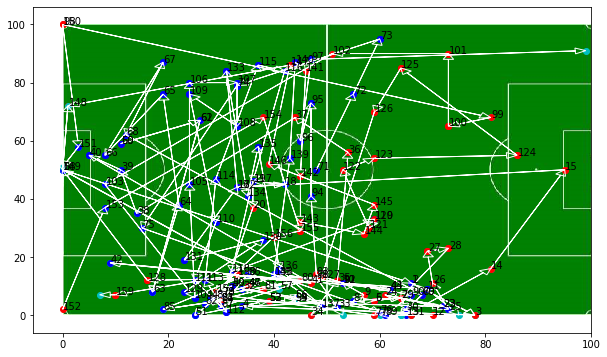

In [199]:
plot_event(Match_dict['Match1'],range(160),draw_line = True)

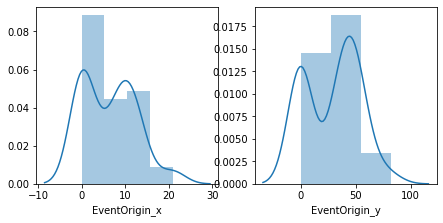

In [200]:
match_ = 'Match1'

plt.figure(figsize=(15,15))

plt.subplot(4,4,1)
sns.distplot(Match_dict[match_].loc[Match_dict[match_].OriginPlayerID == 'Huskies_G1' ].EventOrigin_x)
plt.subplot(4,4,2)
sns.distplot(Match_dict[match_].loc[Match_dict[match_].OriginPlayerID == 'Huskies_G1'].EventOrigin_y)

#### 单独分析射门时的数据

In [185]:
Shot_events = full_events.loc[full_events.EventType == encoders['EventType'].transform(['Shot']).tolist()[0]]
Shot_events.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
204,1,Huskies,Huskies_F3,NaN,1H,725.762958,9,26,83.0,45.0,0.0,0.0
232,1,Opponent1,Opponent1_M3,NaN,1H,871.508779,9,26,76.0,65.0,100.0,100.0
235,1,Opponent1,Opponent1_M3,NaN,1H,874.345314,9,26,83.0,67.0,100.0,100.0
344,1,Huskies,Huskies_M1,NaN,1H,1190.187435,9,26,79.0,72.0,0.0,0.0
402,1,Huskies,Huskies_M1,NaN,1H,1430.877737,9,26,83.0,59.0,0.0,0.0


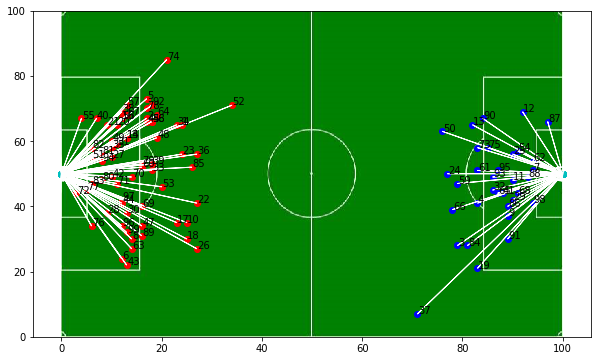

In [198]:
plot_event(Shot_events,range(1,100),draw_line=True)